# Exploratory Data Analysis on Real Estate Dataset

## Introduction

Real Estate price prediction is a dataset originally compiled for regression analysis, linear regression, multiple regression, and predictive tasks. The dataset consists of purchase date, age of property, location, house price of unit area, and distance to nearest station.

The dataset is obtained from Kaggle by bruce.

In [2]:
#Loading libraries
import numpy as np  #Numerical Python library
import pandas as pd #Data Analysis library
import matplotlib.pyplot as plt  #Data Visualization library
import seaborn as sns #Data Visualization library

In [3]:
#Loading dataset
df = pd.read_csv("Real estate.csv")

In [4]:
#First five rows of dataset
print('First five rows of dataset')
df.head(5)

First five rows of dataset


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
#Shape
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in dataset.')

There are 414 rows and 8 columns in dataset.


## Descriptive statistics

Descriptive statistics are those that summarizes the dataset and provide some quick insights.

In [6]:
#Summary

print('Summary table')
df.describe()

Summary table


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000



The mean price of unit area of house is $ 37.98K

## Data Cleaning

Data Cleaning is the process of converting the raw data into the form which aids in the process of analysis.

Data Cleaning methodology is as follows:-

1. Changing column names.
2. Handling missing values.
3. Feature Engineering
4. Dropping Irrelevent attributes.
5. Dropping Duplicate rows.


1. Changing column names
In dataset, with each column name some additional information is also associated signifying its role in prediction analytics. In this step of data cleaning column names are changed to appropriate ones.

In [7]:
#Changing column names
col = ['No', 'Transaction date', 'Age', 'Distance from nearest MRT station', 'No. of convenience stores', 'Latitude',\
       'Longitude', 'Price/Area']

df.columns = col

#After cleaning
df.head()

,No,Transaction date,Age,Distance from nearest MRT station,No. of convenience stores,Latitude,Longitude,Price/Area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


2. Handling missing values

Looking for missing values in the dataset

In [8]:
df.isnull().sum()

No                                   0
Transaction date                     0
Age                                  0
Distance from nearest MRT station    0
No. of convenience stores            0
Latitude                             0
Longitude                            0
Price/Area                           0
dtype: int64

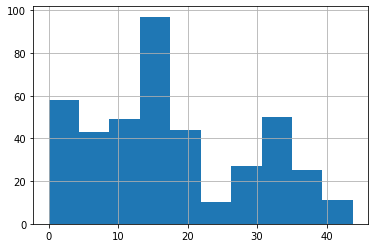

In [9]:
df['Age'].hist()

There are no missing values in dataset. But there are some observations in which Age is numbered as 0. Since Age of 0 doesn't make sense, we will remove those rows.

In [10]:
df_new = df[df['Age'] != 0].reset_index()
df_new.drop('index', axis = 1, inplace = True)
df_new.head()

,No,Transaction date,Age,Distance from nearest MRT station,No. of convenience stores,Latitude,Longitude,Price/Area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


3. Feature Engineering

Adding new feature Year in dataset

In [11]:
df_new['Year'] = df_new['Transaction date'].map(str).apply(lambda x : x.split('.')).apply(lambda x : x[0]).map(int)

In [12]:
df.head()

,No,Transaction date,Age,Distance from nearest MRT station,No. of convenience stores,Latitude,Longitude,Price/Area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


4. Dropping irrelevent attributes

Dropping irrelevent features like 'No' and 'Transaction date' which do not help in analysis.

In [13]:
df_new.drop(['No','Transaction date'], axis = 1, inplace = True)

In [14]:
#New dataset
df_new.head()

,Age,Distance from nearest MRT station,No. of convenience stores,Latitude,Longitude,Price/Area,Year
0,32.0,84.87882,10,24.98298,121.54024,37.9,2012
1,19.5,306.59470,9,24.98034,121.53951,42.2,2012
2,13.3,561.98450,5,24.98746,121.54391,47.3,2013
3,13.3,561.98450,5,24.98746,121.54391,54.8,2013
4,5.0,390.56840,5,24.97937,121.54245,43.1,2012


5. Dropping Duplicate rows

Removing duplicate rows from dataset which have same Age, Distance from nearest MRT station, No. of convenience stores and Year.

In [15]:
df_new = df_new[df_new.duplicated(['Age', 'Distance from nearest MRT station', 'No. of convenience stores',\
                                   'Year']) == False]

In [16]:
df_new = df_new.reset_index(drop = True)

In [17]:
print(f'After removing duplicate rows there are {df_new.shape[0]} rows and {df_new.shape[1]} columns in dataset')

After removing duplicate rows there are 364 rows and 7 columns in dataset


## Exploratory Data Analysis

In [18]:
#First five rows of datset
print('First five rows of dataset')
df_new.head()

First five rows of dataset


,Age,Distance from nearest MRT station,No. of convenience stores,Latitude,Longitude,Price/Area,Year
0,32.0,84.87882,10,24.98298,121.54024,37.9,2012
1,19.5,306.59470,9,24.98034,121.53951,42.2,2012
2,13.3,561.98450,5,24.98746,121.54391,47.3,2013
3,5.0,390.56840,5,24.97937,121.54245,43.1,2012
4,7.1,2175.03000,3,24.96305,121.51254,32.1,2012


Distribution of features


/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

Text(0.5, 0.98, 'Distribution of Features')

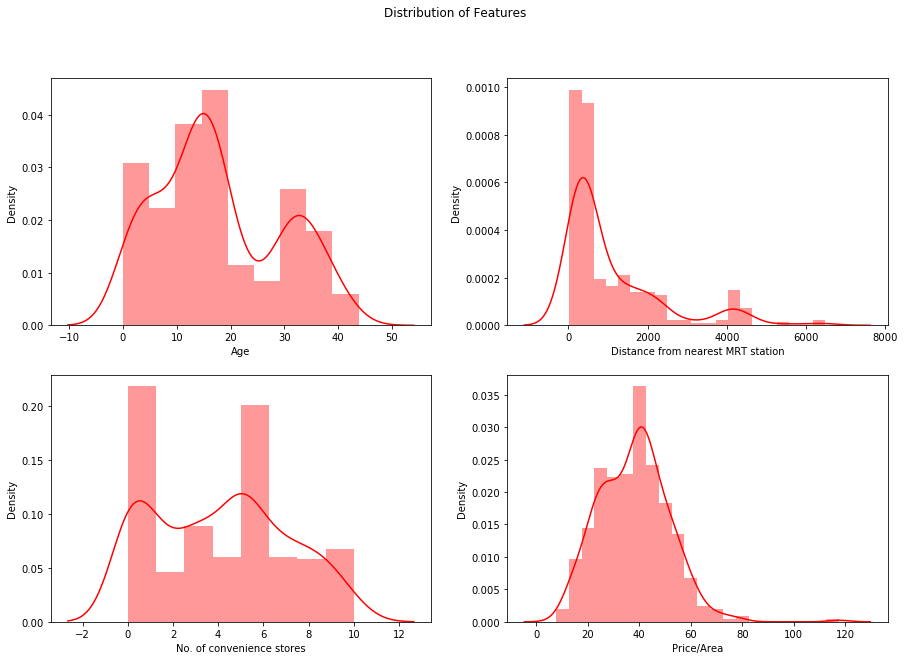

In [19]:
print('Distribution of features')
#Distribution plot of features
fig, axes = plt.subplots(2, 2, figsize = (15, 10))

ax = sns.distplot(df['Age'], ax = axes[0][0], color = 'red')
ax.set_xlabel('Age')

ax = sns.distplot(df['Distance from nearest MRT station'], ax = axes[0][1], color = 'red')
ax.set_xlabel('Distance from nearest MRT station')

ax = sns.distplot(df['No. of convenience stores'], ax = axes[1][0], color = 'red')
ax.set_xlabel('No. of convenience stores')

ax = sns.distplot(df['Price/Area'], ax = axes[1][1], color = 'red')
ax.set_xlabel('Price/Area')

plt.suptitle('Distribution of Features')


The distribution of age shows that in dataset the observations having Age between 20 to 30 is quite less. The distribution of Distance from nearest MRT station is skewed. The distribution of No. of convenient stores and Price / Area is quite normal.

Average price of unit Area for houses


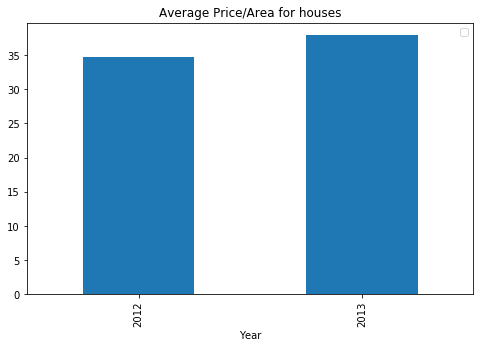

In [20]:
print('Average price of unit Area for houses')

df_bar = df_new[['Price/Area', 'Year']].groupby('Year').mean()
df_bar.plot(kind = 'bar', figsize = (8, 5))
plt.title('Average Price/Area for houses')
plt.legend([])

The above plot shows that the average price of unit area of the property has got increased in year 2013 from year 2012.

In [21]:
#Grouping dataframe by Latitude, longitude and Year
df_l = df_new[['Latitude', 'Longitude', 'Price/Area', 'Year']].groupby(['Latitude', 'Longitude', 'Year']).mean()
df_l.reset_index(inplace = True)

In [23]:

#Top 5 Positions in 2012 having largest Price/Area

print("Top 5 Positions having largest Price/Area in year 2012")
print(df_l[df_l['Year'] == 2012].sort_values(by = 'Price/Area', ascending = False).head().reset_index(drop = True))

print()

#Top 5 Positions in 2013 having largest Price/Area

print("Top 5 Positions having largest Price/Area in year 2013")
print(df_l[df_l['Year'] == 2013].sort_values(by = 'Price/Area', ascending = False).head().reset_index(drop = True))

Top 5 Positions having largest Price/Area in year 2012
   Latitude  Longitude  Year  Price/Area
0  24.95836  121.53756  2012        57.8
1  24.97528  121.54541  2012        57.4
2  24.98085  121.54391  2012        56.2
3  24.98419  121.54243  2012        55.1
4  24.98343  121.53762  2012        54.4

Top 5 Positions having largest Price/Area in year 2013
   Latitude  Longitude  Year  Price/Area
0  24.97460  121.53046  2013       117.5
1  24.97703  121.54265  2013        78.3
2  24.97071  121.54069  2013        78.0
3  24.96756  121.54230  2013        67.7
4  24.97345  121.54093  2013        63.3


Both years do not intersect at any Location. In 2012 Location having Latitude and Longitude (24.95836, 121.53756) is having highest Price/Area. In 2013 Location having Latitude and Longitude (24.97460, 121.53046) is having highest Price/Area

In [23]:
#Bottom 5 Positions in 2012 having smallest Price/Area

print("Bottom 5 Positions having smallest Price/Area in year 2012")
print(df_l[df_l['Year'] == 2012].sort_values(by = 'Price/Area', ascending = False).tail().reset_index(drop = True))

print()

#Top 5 Positions in 2013 having largest Price/Area

print("Bottom 5 Positions having smallest Price/Area in year 2013")
print(df_l[df_l['Year'] == 2013].sort_values(by = 'Price/Area', ascending = False).tail().reset_index(drop = True))

Bottom 5 Positions having smallest Price/Area in year 2012
   Latitude  Longitude  Year  Price/Area
0  24.94297  121.50342  2012        15.0
1  24.94235  121.50357  2012        14.7
2  24.94960  121.53018  2012        13.8
3  24.94968  121.53009  2012        13.7
4  24.94925  121.49542  2012        13.2

Bottom 5 Positions having smallest Price/Area in year 2013
   Latitude  Longitude  Year  Price/Area
0  24.93885  121.50383  2013        13.0
1  24.94935  121.53046  2013        12.8
2  24.94375  121.47883  2013        12.2
3  24.95719  121.47353  2013        11.2
4  24.96172  121.53812  2013         7.6



Both years do not intersect at any Location. In 2012 Location having Latitude and Longitude (24.94925, 121.49542) is having smallest Price/Area. In 2013 Location having Latitude and Longitude (24.96172, 121.53812) is having smallest Price/Area

### Relationship between Distance from nearest MRT station and Average Price/Area

Creating new feature Range that represents the distance of nearest MRT station in steps of 100.

In [24]:
#Range represents the range in 100m within which property has nearest MRT station
df_new['Range'] = ((df_new['Distance from nearest MRT station'] + 50)/100).round() * 100

Text(0.5, 1.0, 'Distribution of Price according to range(metres)')

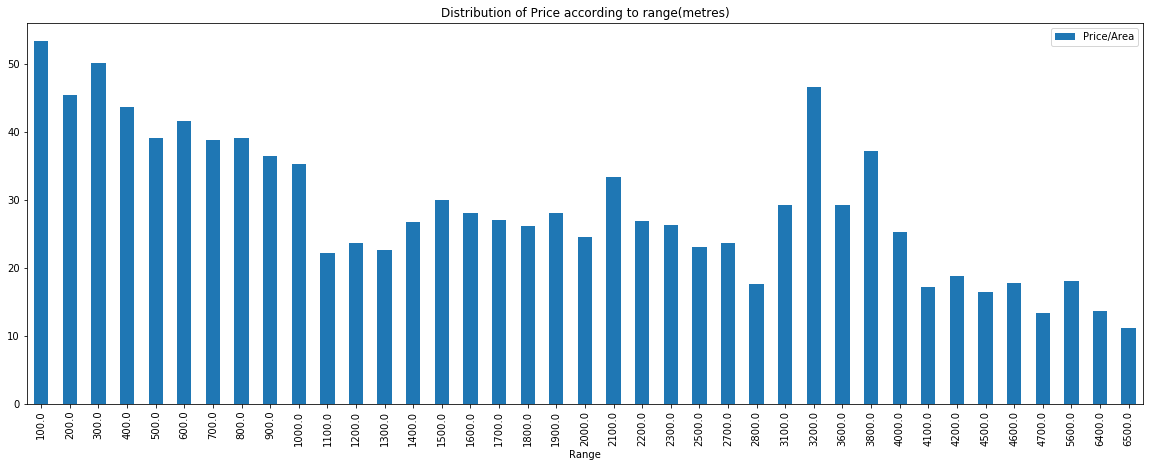

In [25]:
#Grouping observations according to range and finding mean Price/Area
df_m = df_new[['Range', 'Price/Area']].groupby('Range').mean()

#Plotting bar graph
df_m.plot(kind = 'bar', figsize =(20,7))
plt.title('Distribution of Price according to range(metres)')


From the above plot it can be inferred that with every 100m increase in distance to nearest MRT station Price/Value decreases. But there are also some special cases where average Price/Value is also large for larger distance like for 3100m to 4100m.

Text(0.5, 1.0, 'Regression Plot between Range(meters) and Price/Area')

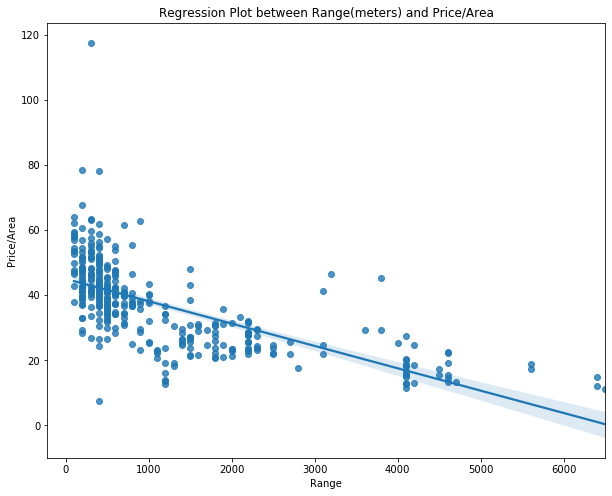

In [26]:
#Plotting regression plot
plt.figure(figsize = (10, 8))
sns.regplot(x = 'Range',y = 'Price/Area', data = df_new)
plt.title('Regression Plot between Range(meters) and Price/Area')

The plot shows that there is the negative relationship between Range and Price per unit area.

### Null Hypothesis: There is no relationship between Range(meters) and Price/Area
### Alternative Hypothesis: There is relationship between Range(meters) and Price/Area

In [27]:
#Doing significance testing using corelation
from scipy.stats import pearsonr

Pearson_coeff, P_value = pearsonr(df_new['Range'],df_new['Price/Area'])

print(f'Pearson Coefficient is {Pearson_coeff} and p-value is {P_value}')

Pearson Coefficient is -0.6659938696879494 and p-value is 5.245294476786513e-48


Since the p-value is smaller than 0.005 there is strong certainity in the result that there is negative relationship between Range(meters) and Price/Area. So we reject the null hypothesis in support of alternative hypothesis.

## Relationship between Age and Price/Area

Text(0.5, 1.0, 'Regression Plot between Age and Price/Area')

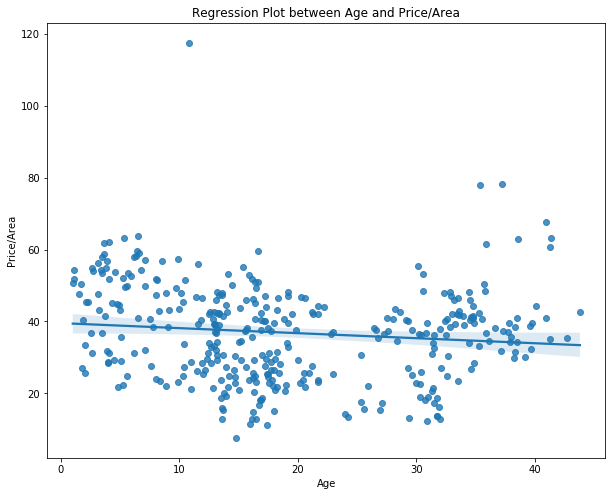

In [28]:
#Plotting regression plot
plt.figure(figsize = (10, 8))
sns.regplot(x = 'Age',y = 'Price/Area', data = df_new)
plt.title('Regression Plot between Age and Price/Area')

From the above plot, it looks like there is very weak relationship between Age and Price/Area.

### Null Hypothesis: There is no relationship between Age and Price/Area
### Alternative Hypothesis: There is relationship between Age and Price/Area

In [29]:
#Doing significance testing using corelation
Pearson_coeff, P_value = pearsonr(df_new['Age'],df_new['Price/Area'])

print(f'Pearson Coefficient is {Pearson_coeff} and p-value is {P_value}')

Pearson Coefficient is -0.11688301554897952 and p-value is 0.025749810593406287


Since the p-value is greater than 0.05 we reject the null hypothesis. There is weak negative relationship between Age and Price/Area.

### Relationship between No. of Convenient Stores and Price/Area

Text(0.5, 1.0, 'Regression Plot between No. of convenience stores and Price/Area')

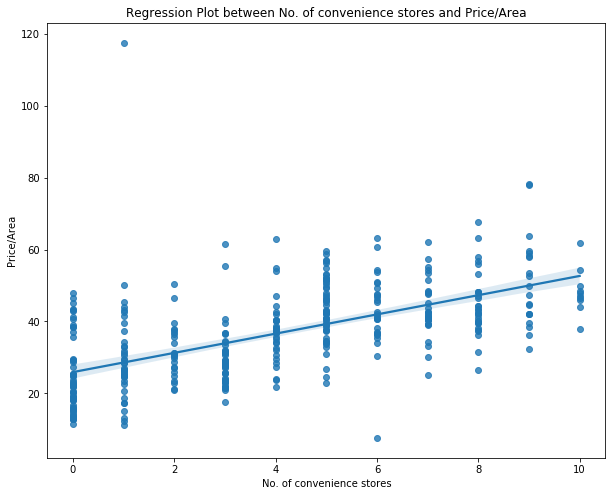

In [30]:
#Plotting regression plot
plt.figure(figsize = (10, 8))
sns.regplot(x = 'No. of convenience stores',y = 'Price/Area', data = df_new)
plt.title('Regression Plot between No. of convenience stores and Price/Area')

The above plot indicates that as the no. of convenient stores increases, Price/Area increases. This plot also shows one location which has highest Price/Area and having only one convenient store near it. So, it is a outlier.

In [31]:
#Code for removing outlier
df_new = df_new[df_new['Price/Area'] != df_new['Price/Area'].max()]

Text(0.5, 1.0, 'Regression Plot between No. of convenience stores and Price/Area(Without outlier)')

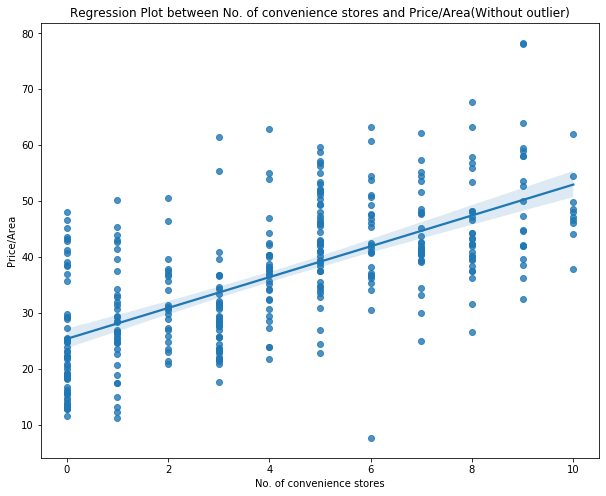

In [32]:
#Plotting regression plot without outlier
plt.figure(figsize = (10, 8))
sns.regplot(x = 'No. of convenience stores',y = 'Price/Area', data = df_new)
plt.title('Regression Plot between No. of convenience stores and Price/Area(Without outlier)')

### Null Hypothesis: There is no relationship between No. of convenience stores and Price/Area

### Alternative Hypothesis: There is relationship between No. of convenience stores and Price/Are

In [33]:
#Doing significance testing using corelation
Pearson_coeff, P_value = pearsonr(df_new['No. of convenience stores'],df_new['Price/Area'])

print(f'Pearson Coefficient is {Pearson_coeff} and p-value is {P_value}')

Pearson Coefficient is 0.6479529669719893 and p-value is 1.3479298513165973e-44


The p-value is below 0.05 level of significance, so the null hypothesis is rejected in support of alternative hypothesis and there is a positive relationship between no. of convenient stores and price/area.

## Relationship between Year and Price/Area

Text(0.5, 1.0, 'Regression Plot between No. of Year and Price/Area')

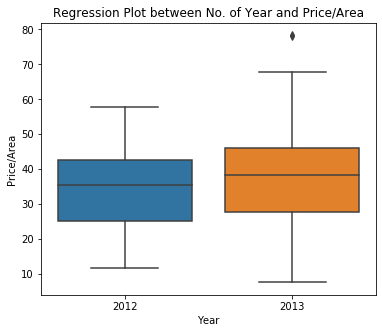

In [34]:
#Plotting Boxplot plot
plt.figure(figsize = (6, 5))
sns.boxplot(x = 'Year',y = 'Price/Area', data = df_new)
plt.title('Regression Plot between No. of Year and Price/Area')

From the above plot, it can be concluded that difference between the median values of two years are not quite different. And the boxes of two box plots overlap with each other a lot. So, it cannot be a good predictor for predicting Price/Area.

### Null Hypothesis: There is no relationship between Year and Price/Area¶

### Alternative Hypothesis: There is relationship between Year and Price/Area

In [35]:
#Importing f_oneway from scipy.stats
from scipy.stats import f_oneway

#Grouping
df_g = df_new[['Year', 'Price/Area']].groupby('Year')

#Performing ANOVA(Analysis of Variance) for significance testing of variables
anova_results = f_oneway(df_g.get_group(2012)['Price/Area'], df_g.get_group(2013)['Price/Area'])

print(anova_results)

F_onewayResult(statistic=4.135171703023447, pvalue=0.0427317734039113)


According to the results of ANOVA(Analysis of Variance), the p value is smaller than 0.05 so we reject the null hypothesis in support of alternative hypothesis. The value of F-statistic is 4.135 which signifies a very weak relationship between both variables.

### Conclusions and future work
The analysis significantly shows a relationship of Distance of nearest MRT station, Age, Year, No. of convenience stores with Price/Area.

The analysis can be extended by analysing the price values at different latitudes and longitudes, through spatial analysis by collecting more data.
